# Modern Control Engineering 3rd Ed
## Katsushiko Ogatta
  
<br />  

### Inverted pendulum system
##### Solution by: Seyed Vahid Ghayoomie


In this Notebook I try to implement the following inverted pendulum system problems using Python.
Problems include: 
- Design of a type 1 servo system with an integrator (problem B-12-13).
- Design of an inverted-pendulum type 1 servo system with a state-feedback gain matrix K (problem B-12-14).
- To check if the Python code generates the same result as the MATLAB one for type 1 servo system (excersice A-12-17).
- Design of an inverted-pendulum type 1 servo system with no integrator (problem B-12-16).

In [1]:
from sympy import *
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tbcontrol, control
from IPython.display import display, Latex, Math

### Problem B-12-13

Consider the type 1 servo system shown in Figure 12-21. Matrices A,B, and C in Figure 12-21 are given by

$$
A = 
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & -5 & -6 \\
\end{bmatrix}
\quad
B = 
\begin{bmatrix}
0 \\
0 \\
1 \\
\end{bmatrix}
\quad
C = 
\begin{bmatrix}
1 & 0 & 0 \\
\end{bmatrix}
$$

Determine the feedback gain constants $k_1, k_2, k_3$ such that the closed-loop poles are located at $s = -2 \pm j4, s = -10$.
Simulate the designed system on the computer. Obtain a computer solution to the unit-step response and plot the curve y(t) versus t.

![Fig 12-21{Fig 12-21}](fig_12_21.png)

** Design of a type 1 servo system  with an integrator **


<IPython.core.display.Math object>

Calculating the controlability matrix using A and B matrices:


<IPython.core.display.Math object>

Which has the rank:  3
So, the system is completely state controllable and arbitrary pole placement is possible.

Now, we can find the characteristic equation of the system:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


And define the desired characteristic polynomial and its matrix:


<IPython.core.display.Math object>

Desired Charachteristic Equation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Since the state equation is already in the controllable canonical form, T=I, so:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


We can also use control.acker() function to simply find matrix K using Ackermann method:


<IPython.core.display.Math object>

So, the control signal u is:


<IPython.core.display.Math object>


Now, we compute the new A, B, C, and D matrices using equation (12-92), and obtain unit-step response using control.step_response() function:


<IPython.core.display.Math object>

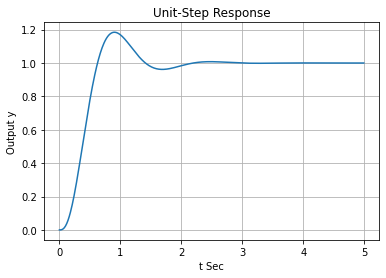

In [2]:
u, r = symbols('u r')
x_1, x_2 = symbols('x_1 x_2')

print('** Design of a type 1 servo system  with an integrator **')

A = Matrix([[0,1,0],[0,0,1],[0,-5,-6]])
B = Matrix([[0],[0],[1]])
C = Matrix([1,0,0]).T
D = Matrix([0])

mu1 = -2+4*I
mu2 = -2-4*I
mu3 = -10

display(Math('A='+latex(A)+', B='+latex(B)+', C='+latex(C)+', D='+latex(D)))

print('Calculating the controlability matrix using A and B matrices:')
M = Matrix.hstack(B, A*B, A**2*B)
display(Math('M='+latex(M)))
print('Which has the rank: ',M.rank())
print('So, the system is completely state controllable and arbitrary pole placement is possible.')

print('\nNow, we can find the characteristic equation of the system:')
Apoly = A.charpoly()
display(Math('|\lambda I - A|='+latex(Apoly.args[0])))
AA = Apoly.all_coeffs()
display(Math('AA='+latex(AA)))

print('\nAnd define the desired characteristic polynomial and its matrix:')
J = Matrix([[mu1,0,0],[0,mu2,0],[0,0,mu3]])
display(Math('J='+latex(J)))
print('Desired Charachteristic Equation: ')
Jpoly = J.charpoly()
display(Math('|\lambda I - J|='+latex(Jpoly.args[0])))
JJ = Jpoly.all_coeffs()
display(Math('JJ='+latex(JJ)))

print('\nSince the state equation is already in the controllable canonical form, T=I, so:')

T=eye(3,3)
JJAA = Matrix([JJ[3]-AA[3],JJ[2]-AA[2],JJ[1]-AA[1]]).T
display(Math('[JJ_{rev} - AA_{rev}]='+latex(JJAA)))
K = JJAA*T.inv()
display(Math('K=[JJ_{rev} - AA_{rev}]T^{-1}='+latex(K)))

print('\nWe can also use control.acker() function to simply find matrix K using Ackermann method:')
K2 = Matrix(control.acker(np.array(A).astype(np.float64),np.array(B).astype(np.float64),np.array([mu1,mu2,mu3]).astype(np.complex)))
display(Math('K='+latex(K2)))

print('So, the control signal u is:')
k1 = K[0]
Ku = Matrix(K[1:]).T
display(Math('u=-Kx+k_1r='+latex((-Ku*Matrix([x_1,x_2]))[0]+k1*r)))

Ahat = A-B*K
Ahat_np = np.array(Ahat).astype(np.float64)
Bhat = B*k1
Bhat_np = np.array(Bhat).astype(np.float64)
Chat = Matrix([1,0,0]).T
Chat_np = np.array(Chat).astype(np.float64)
Dhat = zeros(1,1)
Dhat_np = np.array(Dhat).astype(np.float64)
print('\nNow, we compute the new A, B, C, and D matrices using equation (12-92), and obtain unit-step response using control.step_response() function:')
display(Math('\hat{A}='+latex(Ahat)+', \hat{B}='+latex(Bhat)+', \hat{C}='+latex(Chat)+', \hat{D}='+latex(Dhat)))

sys = control.StateSpace(Ahat_np,Bhat_np,Chat_np,Dhat_np)
t_in = np.arange(0,5,0.01)
# [t,xout] = control.step_response(sys, T=t_in, X0=x0_np)
[t, yout] = control.step_response(sys, T=t_in)

plt.plot(t,yout)
plt.title('Unit-Step Response')
plt.xlabel('t Sec')
plt.ylabel('Output y')
plt.grid()
plt.show()

### Problem B-12-14


Consider the inverted pendulum system discussed in Section 12-4. Referring to the schematic diagram shown in Figure 12-2, assume that
$$ M = 2 \, kg, \quad m = 0.5 \, kg, \quad l = 1 \, m $$
Define state varables as
$$ x_1 = \theta, \quad x_2 = \dot{\theta}, \quad x_3 = x, \quad x_4 = \dot{x} $$
And output variable as
$$ y_1 = \theta = x_1, \quad y_2 = x = x_3 $$
Derive the state-space equations for this system.
It is desired to have closed-loop poles at $ s = \mu_i(i=1,2,3,4) $, where
$$ \mu_1 = -4+j4, \quad \mu_2 = -4-j4, \quad \mu_3 = -20, \quad \mu_4 = -20 $$
Determine the state-feedback gain matrix **K**.
Using the state-feedback gain matrix **K** thus determined, examine the performance of the system by computer simulation. Write a MATLAB program to obtain the response of the system to an arbitrary initial condition. Obtain the response curves $x_1(t)$ versus $t$, $x_2(t)$ versus $t$, $x_3(t)$ versus $t$, and $x_4(t)$ versus $t$ for the following set of initial conditions:
$$ x_1(0) = 0, \quad x_2(0) = 0, \quad x_3(0) = 0, \quad x_4(0) = 1 \, m/s $$

![Fig 12-2{Fig 12-2}](fig_12_2.png)

Finding Matrices A, B, C, and D using equations (12-21) and (12-22):


<IPython.core.display.Math object>

Now, Calculating the controlability matrix:


<IPython.core.display.Math object>

Which has the rank:  4
So, the system is completely state controllable and arbitrary pole placement is possible.

Now, we can find the characteristic equation of the system:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


And define the desired characteristic polynomial and its matrix:


<IPython.core.display.Math object>

Desired Charachteristic Equation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Now, We can determine the state-feedback gain matrix K using equation (12-13):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


We can also use control.acker() function to simply find matrix K using Ackermann method:


<IPython.core.display.Math object>

So, the control signal u is:


<IPython.core.display.Math object>


Now, we compute the new A, B, C, and D matrices using equation (12-129), and obtain system response to initial condition using control.step_response() function:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

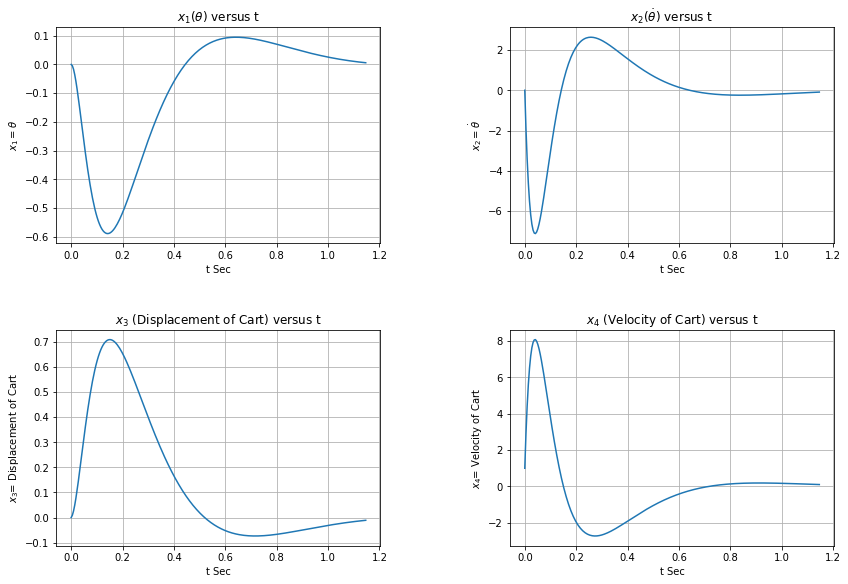

In [56]:
theta, thetad, x, xd, u, s = symbols('theta \dot{\\theta} x \dot{x} u s')
x_1, x_2, x_3, x_4 = symbols('x_1 x_2 x_3 x_4')

M = 2
m = 0.5
l = 1
g = 9.81

x1 = theta
x2 = thetad
x3 = x
x4 = xd

y1 = x1
y2 = x3

mu1 = -4+4*I
mu2 = -4-4*I
mu3 = -20
mu4 = -20

xm = Matrix([[x1],[x2],[x3],[x4]])
ym = Matrix([[y1],[y2]])

x1d = x2
x2d = ((M+m)*g*x1)/(M*l) - u/(M*l)
x3d = x4
x4d = -(m*g*x1)/M + u/M

print('Finding Matrices A, B, C, and D using equations (12-21) and (12-22):')
A = Matrix([[0,1,0,0],[((M+m)*g)/(M*l),0,0,0],[0,0,0,1],[-(m*g)/M,0,0,0]])
B = Matrix([0,- 1/(M*l),0,1/M])
C = Matrix([[1,0,0,0],[0,0,1,0]])
D = Matrix([[0],[0]])
xd = A*xm + B*u
y = C*xm

display(Math('A='+latex(A)+', B='+latex(B)+', C='+latex(C)+', D='+latex(D)))

print('Now, Calculating the controlability matrix:')
M = Matrix.hstack(B, A*B, A**2*B, A**3*B)
display(Math('M='+latex(M)))
print('Which has the rank: ',M.rank())
print('So, the system is completely state controllable and arbitrary pole placement is possible.')

print('\nNow, we can find the characteristic equation of the system:')
Apoly = A.charpoly()
display(Math('|\lambda I - A|='+latex(Apoly.args[0])))
AA = Apoly.all_coeffs()
display(Math('AA='+latex(AA)))

print('\nAnd define the desired characteristic polynomial and its matrix:')
J = Matrix([[mu1,0,0,0],[0,mu2,0,0],[0,0,mu3,0],[0,0,0,mu4]])
display(Math('J='+latex(J)))
print('Desired Charachteristic Equation: ')
Jpoly = J.charpoly()
display(Math('|\lambda I - J|='+latex(Jpoly.args[0])))
JJ = Jpoly.all_coeffs()
display(Math('JJ='+latex(JJ)))

print('\nNow, We can determine the state-feedback gain matrix K using equation (12-13):')

def wmat(Amat):
    Al = len(Amat)
    out = np.zeros(shape=(Al-1,Al-1))
    for i in range(Al-1):
        for j in range(Al-i-1):
            out[i,j] = Amat[Al-2-i-j]
    return out

W = Matrix(wmat(AA))
display(Math('W='+latex(W)))
T = M*W
display(Math('T=MW='+latex(T)))
display(Math('T^{-1}='+latex(T.inv())))
JJAA = Matrix([[JJ[4]-AA[4],JJ[3]-AA[3],JJ[2]-AA[2],JJ[1]-AA[1]]])
display(Math('[JJ_{rev} - AA_{rev}]='+latex(JJAA)))
K = JJAA*T.inv()
display(Math('K=[JJ_{rev} - AA_{rev}]T^{-1}='+latex(K)))

print('\nWe can also use control.acker() function to simply find matrix K using Ackermann method:')
K2 = control.acker(np.array(A).astype(np.float64),np.array(B).astype(np.float64),np.array([mu1,mu2,mu3,mu4]).astype(np.complex))
display(Math('K='+latex(K2)))

print('So, the control signal u is:')
display(Math('u=-Kx='+latex((-K*Matrix([x_1,x_2,x_3,x_4]))[0])))

x_1_0 = 0
x_2_0 = 0
x_3_0 = 0
x_4_0 = 1
Ahat = A-B*K
Ahat_np = np.array(Ahat).astype(np.float64)
Bhat = Matrix([x_1_0,x_2_0,x_3_0,x_4_0])
print('\nNow, we compute the new A, B, C, and D matrices using equation (12-129), and obtain system response to initial condition using control.step_response() function:')
display(Math(latex(xm)+'='+latex(Bhat)))
display(Math('\hat{A}='+latex(Ahat)+', \hat{B}='+latex(Bhat)))
display(Math('\hat{C}='+latex(Ahat)+', \hat{D}='+latex(Bhat)))

Bhat_np = np.array(Bhat).astype(np.float64)
sys = control.StateSpace(Ahat_np,Bhat_np,Ahat_np,Bhat_np)
[t,xout] = control.step_response(sys)

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.9, top=1.9, wspace=0.4, hspace=0.4)

plt.subplot(2,2,1)
plt.plot(t,xout[0])
plt.title('$x_1 (\\theta)$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_1=\\theta$')
plt.grid()

plt.subplot(2,2,2)
plt.plot(t,xout[1])
plt.title('$x_2 (\\dot{\\theta})$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_2=\\dot{\\theta}$')
plt.grid()

plt.subplot(2,2,3)
plt.plot(t,xout[2])
plt.title('$x_3$ (Displacement of Cart) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_3$= Displacement of Cart')
plt.grid()

plt.subplot(2,2,4)
plt.plot(t,xout[3])
plt.title('$x_4$ (Velocity of Cart) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_4$= Velocity of Cart')
plt.grid()

plt.show()

### Excersice A-12-17 
#### (To check if the Python code generates the same result as the MATLAB one for type 1 servo system)


Consider the same inverted-pendulum control system as discussed in Section 12-8. Design a state-feedback gain matrix **K**, where $K=[k_1 k_2 k_3 k_4]$, and an integral gain constant $k_l$. Assume that the desired closed-loop poles for the system are
$$ \mu_1 = -2.5+j2.5, \quad \mu_2 = -2.5-j2.5, \quad \mu_3 = \mu_4 = \mu_5 = -10 $$
Using MATLAB, determine gain constant **K** and integral gain constant $k_l$. Also, obtain step-response curves when a unit-step input is applied to the cart position.

** Design of a type 1 servo system **

Finding Matrices A, B, C, and D using equations (12-21) and (12-22):


<IPython.core.display.Math object>

Now defining Matrices A1, B1:


<IPython.core.display.Math object>

And Calculating the controlability matrix using new A and B matrices:


<IPython.core.display.Math object>

Which has the rank:  5
So, the system is completely state controllable and arbitrary pole placement is possible.

Now, we can find the characteristic equation of the system:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


And define the desired characteristic polynomial and its matrix:


<IPython.core.display.Math object>

Desired Charachteristic Equation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Now, We can determine the state-feedback gain matrix K using equation (12-13):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


We can also use control.acker() function to simply find matrix K using Ackermann method:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

So, the control signal u is:


<IPython.core.display.Math object>


Now, we compute the new A, B, C, and D matrices using equation (12-129), and obtain system response to initial condition using control.step_response() function:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

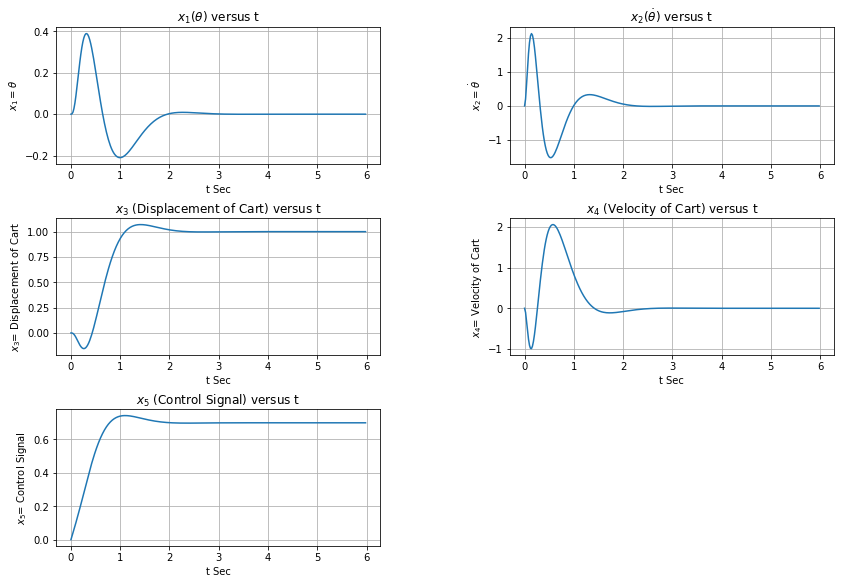

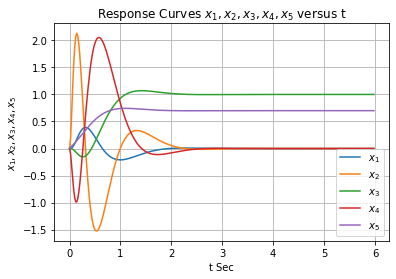

In [78]:
theta, thetad, x, xd, zeta, u, s = symbols('theta \dot{\\theta} x \dot{x} \zeta u s')
x_1, x_2, x_3, x_4 = symbols('x_1 x_2 x_3 x_4')

M = 2
m = 0.1
l = 0.5
g = 9.81

x1 = theta
x2 = thetad
x3 = x
x4 = xd

y1 = x1
y2 = x3

mu1 = -2.5+2.5*I
mu2 = -2.5-2.5*I
mu3 = -10
mu4 = -10
mu5 = -10

xm = Matrix([[x1],[x2],[x3],[x4]])
ym = Matrix([[y1],[y2]])

x1d = x2
x2d = ((M+m)*g*x1)/(M*l) - u/(M*l)
x3d = x4
x4d = -(m*g*x1)/M + u/M

print('** Design of a type 1 servo system  with no integrator **')
print('\nFinding Matrices A, B, C, and D using equations (12-21) and (12-22):')
A = Matrix([[0,1,0,0],[((M+m)*g)/(M*l),0,0,0],[0,0,0,1],[-(m*g)/M,0,0,0]])
B = Matrix([0,-1/(M*l),0,1/M])
C = Matrix([[0,0,1,0]])
D = Matrix([0])
xd = A*xm + B*u
y = C*xm

display(Math('A='+latex(A)+', B='+latex(B)+', C='+latex(C)+', D='+latex(D)))

print('Now defining Matrices A1, B1:')
A1 = Matrix.hstack(Matrix.vstack(A,-C),zeros(5,1))
B1 = Matrix.vstack(B, Matrix([0]))
display(Math('A1='+latex(A1)+', B1='+latex(B1)))

print('And Calculating the controlability matrix using new A and B matrices:')
M = Matrix.hstack(B1, A1*B1, A1**2*B1, A1**3*B1, A1**4*B1)
display(Math('M='+latex(M)))
print('Which has the rank: ',M.rank())
print('So, the system is completely state controllable and arbitrary pole placement is possible.')

print('\nNow, we can find the characteristic equation of the system:')
A1poly = A1.charpoly()
display(Math('|\lambda I - A1|='+latex(A1poly.args[0])))
AA = A1poly.all_coeffs()
display(Math('AA='+latex(AA)))

print('\nAnd define the desired characteristic polynomial and its matrix:')
J = Matrix([[mu1,0,0,0,0],[0,mu2,0,0,0],[0,0,mu3,0,0],[0,0,0,mu4,0],[0,0,0,0,mu5]])
display(Math('J='+latex(J)))
print('Desired Charachteristic Equation: ')
Jpoly = J.charpoly()
display(Math('|\lambda I - J|='+latex(Jpoly.args[0])))
JJ = Jpoly.all_coeffs()
display(Math('JJ='+latex(JJ)))

print('\nNow, We can determine the state-feedback gain matrix K using equation (12-13):')

def wmat(Amat):
    Al = len(Amat)
    out = np.zeros(shape=(Al-1,Al-1))
    for i in range(Al-1):
        for j in range(Al-i-1):
            out[i,j] = Amat[Al-2-i-j]
    return out

W = Matrix(wmat(AA))
display(Math('W='+latex(W)))
T = M*W
display(Math('T=MW='+latex(T)))
display(Math('T^{-1}='+latex(T.inv())))
JJAA = Matrix([[JJ[5]-AA[5],JJ[4]-AA[4],JJ[3]-AA[3],JJ[2]-AA[2],JJ[1]-AA[1]]])
display(Math('[JJ_{rev} - AA_{rev}]='+latex(JJAA)))
K = JJAA*T.inv()
display(Math('K=[JJ_{rev} - AA_{rev}]T^{-1}='+latex(K[:-1])))
display(Math('k_l=-K[5]='+latex(-K[-1])))

print('\nWe can also use control.acker() function to simply find matrix K using Ackermann method:')
K2 = Matrix(control.acker(np.array(A1).astype(np.float64),np.array(B1).astype(np.float64),np.array([mu1,mu2,mu3,mu4,mu5]).astype(np.complex)))
display(Math('K='+latex(K2[:-1])))
display(Math('k_l=-K[5]='+latex(-K2[-1])))

print('So, the control signal u is:')
kl = -K[-1]
K = Matrix(K[:-1]).T
display(Math('u=-Kx+k_l\zeta='+latex((-K*Matrix([x_1,x_2,x_3,x_4]))[0]+kl*zeta)))

x_1_0 = 0
x_2_0 = 0
x_3_0 = 1
x_4_0 = 0
x_5_0 = 0
x0 = Matrix([x_1_0,x_2_0,x_3_0,x_4_0,x_5_0])
x0_np = np.array(x0).astype(np.float64)

Ahat = Matrix.hstack(Matrix.vstack(A-B*K,-C),Matrix.vstack(B*kl,zeros(1,1)))
Ahat_np = np.array(Ahat).astype(np.float64)
Bhat = Matrix([0,0,0,0,1])
Bhat_np = np.array(Bhat).astype(np.float64)
Chat = Matrix.hstack(C, zeros(1,1))
# Chat = Chat.row_insert(4,Chat0)
# Chat = eye(5,5)
Chat_np = np.array(Chat).astype(np.float64)
# Dhat = zeros(5,1)
Dhat = zeros(1,1)
Dhat_np = np.array(Dhat).astype(np.float64)
print('\nNow, we compute the new A, B, C, and D matrices using equation (12-129), and obtain system response to initial condition using control.step_response() function:')
xm2 = Matrix.vstack(xm, Matrix([zeta]))
display(Math(latex(xm2)+'='+latex(x0)))
display(Math('\hat{A}='+latex(Ahat)+', \hat{B}='+latex(Bhat)+', \hat{C}='+latex(Chat)+', \hat{D}='+latex(Dhat)))

sys = control.StateSpace(Ahat_np,Bhat_np,Chat_np,Dhat_np)
t_in = np.arange(0,6,0.02)
# [t,xout] = control.step_response(sys, T=t_in, X0=x0_np)
[t, yout, xout] = control.step_response(sys, T=t_in, return_x=True)
# print(out)
# [t,xout] = out
# print(t)
# print(xout)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.9, top=1.9, wspace=0.4, hspace=0.4)
# fig = plt.figure()

plt.subplot(3,2,1)
plt.plot(t,xout[0])
# fig.plot(t,xout[0])
plt.title('$x_1 (\\theta)$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_1=\\theta$')
plt.grid()

plt.subplot(3,2,2)
plt.plot(t,xout[1])
# fig.plot(t,xout[1])
plt.title('$x_2 (\\dot{\\theta})$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_2=\\dot{\\theta}$')
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,xout[2])
# fig.plot(t,xout[2])
plt.title('$x_3$ (Displacement of Cart) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_3$= Displacement of Cart')
plt.grid()

plt.subplot(3,2,4)
plt.plot(t,xout[3])
# fig.plot(t,xout[3])
plt.title('$x_4$ (Velocity of Cart) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_4$= Velocity of Cart')
plt.grid()

plt.subplot(3,2,5)
plt.plot(t,xout[4])
# fig.plot(t,xout[4])
plt.title('$x_5$ (Control Signal) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_5$= Control Signal')
plt.grid()

plt.show()
plt.close()

for i,xo in enumerate(xout):
    plt.plot(t,xo,label='$x_{}$'.format(i+1))
plt.title('Response Curves $x_1, x_2, x_3, x_4, x_5$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_1, x_2, x_3, x_4, x_5$')
plt.grid()
plt.legend()
plt.show()

### Problem B-12-16


Consider the same inverted-pendulum control system as discussed in Section 12-8. Design a state-feedback gain matrix **K**, where $K=[k_1 k_2 k_3 k_4]$, and an integral gain constant $k_l$. Assume that the desired closed-loop poles for the system are
$$ \mu_1 = -2, \quad \mu_2 = -2, \quad \mu_3 = \mu_4 = \mu_5 = -10 $$
Using MATLAB, determine gain constant **K** and integral gain constant $k_l$. Also, obtain step-response curves when a unit-step input is applied to the cart position.

** Design of a type 1 servo system **

Finding Matrices A, B, C, and D using equations (12-21) and (12-22):


<IPython.core.display.Math object>

Now defining Matrices A1, B1:


<IPython.core.display.Math object>

And Calculating the controlability matrix using new A and B matrices:


<IPython.core.display.Math object>

Which has the rank:  5
So, the system is completely state controllable and arbitrary pole placement is possible.

Now, we can find the characteristic equation of the system:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


And define the desired characteristic polynomial and its matrix:


<IPython.core.display.Math object>

Desired Charachteristic Equation: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Now, We can determine the state-feedback gain matrix K using equation (12-13):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


We can also use control.acker() function to simply find matrix K using Ackermann method:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

So, the control signal u is:


<IPython.core.display.Math object>


Now, we compute the new A, B, C, and D matrices using equation (12-129), and obtain system response to initial condition using control.step_response() function:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

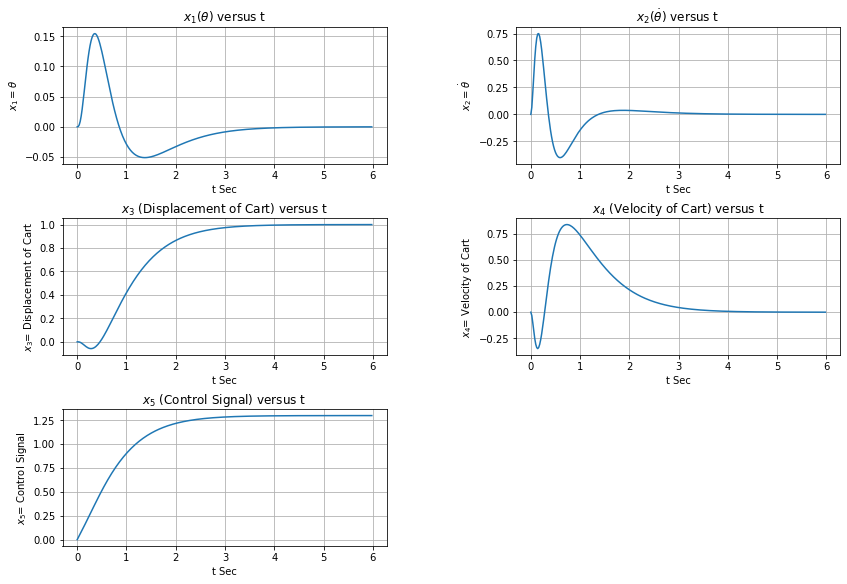

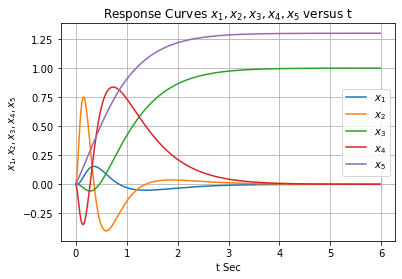

In [76]:
theta, thetad, x, xd, zeta, u, s = symbols('theta \dot{\\theta} x \dot{x} \zeta u s')
x_1, x_2, x_3, x_4 = symbols('x_1 x_2 x_3 x_4')

M = 2
m = 0.1
l = 0.5
g = 9.81

x1 = theta
x2 = thetad
x3 = x
x4 = xd

y1 = x1
y2 = x3

mu1 = -2
mu2 = -2
mu3 = -10
mu4 = -10
mu5 = -10

xm = Matrix([[x1],[x2],[x3],[x4]])
ym = Matrix([[y1],[y2]])

x1d = x2
x2d = ((M+m)*g*x1)/(M*l) - u/(M*l)
x3d = x4
x4d = -(m*g*x1)/M + u/M

print('** Design of a type 1 servo system with no integrator**')
print('\nFinding Matrices A, B, C, and D using equations (12-21) and (12-22):')
A = Matrix([[0,1,0,0],[((M+m)*g)/(M*l),0,0,0],[0,0,0,1],[-(m*g)/M,0,0,0]])
B = Matrix([0,-1/(M*l),0,1/M])
C = Matrix([[0,0,1,0]])
D = Matrix([0])
xd = A*xm + B*u
y = C*xm

display(Math('A='+latex(A)+', B='+latex(B)+', C='+latex(C)+', D='+latex(D)))

print('Now defining Matrices A1, B1:')
A1 = Matrix.hstack(Matrix.vstack(A,-C),zeros(5,1))
B1 = Matrix.vstack(B, Matrix([0]))
display(Math('A1='+latex(A1)+', B1='+latex(B1)))

print('And Calculating the controlability matrix using new A and B matrices:')
M = Matrix.hstack(B1, A1*B1, A1**2*B1, A1**3*B1, A1**4*B1)
display(Math('M='+latex(M)))
print('Which has the rank: ',M.rank())
print('So, the system is completely state controllable and arbitrary pole placement is possible.')

print('\nNow, we can find the characteristic equation of the system:')
A1poly = A1.charpoly()
display(Math('|\lambda I - A1|='+latex(A1poly.args[0])))
AA = A1poly.all_coeffs()
display(Math('AA='+latex(AA)))

print('\nAnd define the desired characteristic polynomial and its matrix:')
J = Matrix([[mu1,0,0,0,0],[0,mu2,0,0,0],[0,0,mu3,0,0],[0,0,0,mu4,0],[0,0,0,0,mu5]])
display(Math('J='+latex(J)))
print('Desired Charachteristic Equation: ')
Jpoly = J.charpoly()
display(Math('|\lambda I - J|='+latex(Jpoly.args[0])))
JJ = Jpoly.all_coeffs()
display(Math('JJ='+latex(JJ)))

print('\nNow, We can determine the state-feedback gain matrix K using equation (12-13):')

def wmat(Amat):
    Al = len(Amat)
    out = np.zeros(shape=(Al-1,Al-1))
    for i in range(Al-1):
        for j in range(Al-i-1):
            out[i,j] = Amat[Al-2-i-j]
    return out

W = Matrix(wmat(AA))
display(Math('W='+latex(W)))
T = M*W
display(Math('T=MW='+latex(T)))
display(Math('T^{-1}='+latex(T.inv())))
JJAA = Matrix([[JJ[5]-AA[5],JJ[4]-AA[4],JJ[3]-AA[3],JJ[2]-AA[2],JJ[1]-AA[1]]])
display(Math('[JJ_{rev} - AA_{rev}]='+latex(JJAA)))
K = JJAA*T.inv()
display(Math('K=[JJ_{rev} - AA_{rev}]T^{-1}='+latex(K[:-1])))
display(Math('k_l=-K[5]='+latex(-K[-1])))

print('\nWe can also use control.acker() function to simply find matrix K using Ackermann method:')
K2 = Matrix(control.acker(np.array(A1).astype(np.float64),np.array(B1).astype(np.float64),np.array([mu1,mu2,mu3,mu4,mu5]).astype(np.float64)))
display(Math('K='+latex(K2[:-1])))
display(Math('k_l=-K[5]='+latex(-K2[-1])))

print('So, the control signal u is:')
kl = -K[-1]
K = Matrix(K[:-1]).T
display(Math('u=-Kx+k_l\zeta='+latex((-K*Matrix([x_1,x_2,x_3,x_4]))[0]+kl*zeta)))

x_1_0 = 0
x_2_0 = 0
x_3_0 = 1
x_4_0 = 0
x_5_0 = 0
x0 = Matrix([x_1_0,x_2_0,x_3_0,x_4_0,x_5_0])
x0_np = np.array(x0).astype(np.float64)

Ahat = Matrix.hstack(Matrix.vstack(A-B*K,-C),Matrix.vstack(B*kl,zeros(1,1)))
Ahat_np = np.array(Ahat).astype(np.float64)
Bhat = Matrix([0,0,0,0,1])
Bhat_np = np.array(Bhat).astype(np.float64)
Chat = Matrix.hstack(C, zeros(1,1))
# Chat = Chat.row_insert(4,Chat0)
# Chat = eye(5,5)
Chat_np = np.array(Chat).astype(np.float64)
# Dhat = zeros(5,1)
Dhat = zeros(1,1)
Dhat_np = np.array(Dhat).astype(np.float64)
print('\nNow, we compute the new A, B, C, and D matrices using equation (12-129), and obtain system response to initial condition using control.step_response() function:')
xm2 = Matrix.vstack(xm, Matrix([zeta]))
display(Math(latex(xm2)+'='+latex(x0)))
display(Math('\hat{A}='+latex(Ahat)+', \hat{B}='+latex(Bhat)+', \hat{C}='+latex(Chat)+', \hat{D}='+latex(Dhat)))

sys = control.StateSpace(Ahat_np,Bhat_np,Chat_np,Dhat_np)
t_in = np.arange(0,6,0.02)
# [t,xout] = control.step_response(sys, T=t_in, X0=x0_np)
[t, yout, xout] = control.step_response(sys, T=t_in, return_x=True)
# print(out)
# [t,xout] = out
# print(t)
# print(xout)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.9, top=1.9, wspace=0.4, hspace=0.4)
# fig = plt.figure()

plt.subplot(3,2,1)
plt.plot(t,xout[0])
# fig.plot(t,xout[0])
plt.title('$x_1 (\\theta)$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_1=\\theta$')
plt.grid()

plt.subplot(3,2,2)
plt.plot(t,xout[1])
# fig.plot(t,xout[1])
plt.title('$x_2 (\\dot{\\theta})$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_2=\\dot{\\theta}$')
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,xout[2])
# fig.plot(t,xout[2])
plt.title('$x_3$ (Displacement of Cart) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_3$= Displacement of Cart')
plt.grid()

plt.subplot(3,2,4)
plt.plot(t,xout[3])
# fig.plot(t,xout[3])
plt.title('$x_4$ (Velocity of Cart) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_4$= Velocity of Cart')
plt.grid()

plt.subplot(3,2,5)
plt.plot(t,xout[4])
# fig.plot(t,xout[4])
plt.title('$x_5$ (Control Signal) versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_5$= Control Signal')
plt.grid()

plt.show()
plt.close()

for i,xo in enumerate(xout):
    plt.plot(t,xo,label='$x_{}$'.format(i+1))
plt.title('Response Curves $x_1, x_2, x_3, x_4, x_5$ versus t')
plt.xlabel('t Sec')
plt.ylabel('$x_1, x_2, x_3, x_4, x_5$')
plt.grid()
plt.legend()
plt.show()